In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
# Read the input file into a Pandas data frame
bank_add = pd.read_csv('training_set.csv')
bank_add.head()

response_housing = bank_add[['housing', 'age', 'job_admin_', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'basic_basic',
       'basic_high_school', 'basic_illiterate', 'basic_professional_course',
       'basic_university_degree']]
response_housing.head()

,housing,age,job_admin_,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,basic_basic,basic_high_school,basic_illiterate,basic_professional_course,basic_university_degree
0,yes,35,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,no,30,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,yes,70,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,yes,35,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,yes,35,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [3]:
# 'val' is a function to replace 'yes' and 'no' 
# for houseng loan with 1 and 0 respectively
def val(x):
    if x == 'yes':
        return 1
    elif x == 'no':
        return 0
    else:
        return x

response_housing['housing'] = response_housing['housing'].apply(val)

#drop all the unknowns
response_housing = response_housing.replace('unknown', np.nan)
response_housing = response_housing.dropna()

response_housing.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python2.7/site-packages/pandas/core/common.py:449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


,housing,age,job_admin_,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,basic_basic,basic_high_school,basic_illiterate,basic_professional_course,basic_university_degree
0,1,35,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,30,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1,70,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,35,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,35,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [26]:
# Split the data into train and test sets

X_housing = response_housing.iloc[:, 1:]
y_housing = response_housing.iloc[:,0]
Xh_train, Xh_test, yh_train, yh_test = train_test_split(X_housing, y_housing, test_size=0.3, random_state=4444)


In [27]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

#housing
logreg = LogisticRegression()
lr_housing = logreg.fit(Xh_train, yh_train)
lr_housing_pred = lr_housing.predict(Xh_test)

print confusion_matrix(yh_test, lr_housing_pred)
print classification_report(yh_test, lr_housing_pred)

# Cross validation score
lr_cv = cross_val_score(logreg, X_housing, y_housing, cv=10)
lr_cv_score = lr_cv.mean()
print "Cross validation score:", lr_cv_score


[[  71 4378]
 [  95 5101]]
             precision    recall  f1-score   support

        0.0       0.43      0.02      0.03      4449
        1.0       0.54      0.98      0.70      5196

avg / total       0.49      0.54      0.39      9645

Cross validation score: 0.537575983751


In [28]:
# K Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

re_score = 0.0
k_val = 0
for k in range(1, 21):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(Xh_train, yh_train)
    yh_pred = neigh.predict(Xh_test)
    score = recall_score(yh_test, yh_pred)
    if re_score < score:
        re_score = score
        k_val = k
        

# Cross validation score
knn_cv = cross_val_score(neigh, X_housing, y_housing, cv=10)
knn_cv_score = knn_cv.mean()

print confusion_matrix(yh_test, yh_pred)
print classification_report(yh_test, yh_pred)
print "Cross validation score:", knn_cv_score

[[2078 2371]
 [2440 2756]]
             precision    recall  f1-score   support

        0.0       0.46      0.47      0.46      4449
        1.0       0.54      0.53      0.53      5196

avg / total       0.50      0.50      0.50      9645

Cross validation score: 0.502396261962


In [10]:
#Naive Bayes

from sklearn import naive_bayes

nb_gau_model = naive_bayes.GaussianNB()
nb_gau_model.fit(Xh_train, yh_train)
nb_gau_pred = nb_gau_model.predict(Xh_test)
# Cross validation score
nb_gau_cv = cross_val_score(nb_gau_model, X_housing, y_housing, cv=10)
nb_gau_cv_score = nb_gau_cv.mean()


nb_multi_model = naive_bayes.MultinomialNB()
nb_multi_model.fit(Xh_train, yh_train)
nb_multi_pred = nb_multi_model.predict(Xh_test)
# Cross validation score
nb_multi_cv = cross_val_score(nb_multi_model, X_housing, y_housing, cv=10)
nb_multi_cv_score = nb_multi_cv.mean()


nb_ber_model = naive_bayes.BernoulliNB()
nb_ber_model.fit(Xh_train, yh_train)
nb_ber_pred = nb_ber_model.predict(Xh_test)
# Cross validation score
nb_ber_cv = cross_val_score(nb_ber_model, X_housing, y_housing, cv=10)
nb_ber_cv_score = nb_ber_cv.mean()


print "Gaussian Naive Bayes: "
print confusion_matrix(yh_test, nb_gau_pred)
print classification_report(yh_test, nb_gau_pred)
print "Cross validation score:", nb_gau_cv_score


print "Multinomial Naive Bayes: "
print confusion_matrix(yh_test, nb_multi_pred)
print classification_report(yh_test, nb_multi_pred)
print "Cross validation score:", nb_multi_cv_score


print "Bernoulli Naive Bayes: "
print confusion_matrix(yh_test, nb_ber_pred)
print classification_report(yh_test, nb_ber_pred)
print "Cross validation score:", nb_ber_cv_score



Gaussian Naive Bayes: 
[[3076 1373]
 [3470 1726]]
             precision    recall  f1-score   support

        0.0       0.47      0.69      0.56      4449
        1.0       0.56      0.33      0.42      5196

avg / total       0.52      0.50      0.48      9645

Cross validation score: 0.499875979774
Multinomial Naive Bayes: 
[[ 314 4135]
 [ 377 4819]]
             precision    recall  f1-score   support

        0.0       0.45      0.07      0.12      4449
        1.0       0.54      0.93      0.68      5196

avg / total       0.50      0.53      0.42      9645

Cross validation score: 0.534963250331
Bernoulli Naive Bayes: 
[[ 835 3614]
 [ 953 4243]]
             precision    recall  f1-score   support

        0.0       0.47      0.19      0.27      4449
        1.0       0.54      0.82      0.65      5196

avg / total       0.51      0.53      0.47      9645

Cross validation score: 0.528835606699


In [15]:
# SVM
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(Xh_train, yh_train)
svc_pred = svc_model.predict(Xh_test)
# Cross validation score
svc_cv = cross_val_score(svc_model, X_housing, y_housing, cv=10)
svc_cv_score = svc_cv.mean()

print "SVM classifier: "
print confusion_matrix(yh_test, svc_pred)
print classification_report(yh_test, svc_pred)
print "Cross validation score:", svc_cv_score


SVM classifier: 
[[ 433 4016]
 [ 517 4679]]
             precision    recall  f1-score   support

        0.0       0.46      0.10      0.16      4449
        1.0       0.54      0.90      0.67      5196

avg / total       0.50      0.53      0.44      9645

Cross validation score: 0.535429958476


In [12]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

#Housing
dt_model = DecisionTreeClassifier()
dt_model.fit(Xh_train, yh_train)
dt_pred = dt_model.predict(Xh_test)
# Cross validation score
dt_cv = cross_val_score(dt_model, X_housing, y_housing, cv=10)
dt_cv_score = dt_cv.mean()

print "DecisionTree classifier: "
print confusion_matrix(yh_test, dt_pred)
print classification_report(yh_test, dt_pred)
print "Cross validation score:", dt_cv_score


DecisionTree classifier: 
[[1910 2539]
 [2198 2998]]
             precision    recall  f1-score   support

        0.0       0.46      0.43      0.45      4449
        1.0       0.54      0.58      0.56      5196

avg / total       0.51      0.51      0.51      9645

Cross validation score: 0.503422236211


In [14]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier

# housing
rf_model = RandomForestClassifier()
rf_model.fit(Xh_train, yh_train)
rf_pred = rf_model.predict(Xh_test)
# Cross validation score
rf_cv = cross_val_score(rf_model, X_housing, y_housing, cv=10)
rf_cv_score = rf_cv.mean()

print "RandomForest classifier: "
print confusion_matrix(yh_test, rf_pred)
print classification_report(yh_test, rf_pred)
print "Cross validation score:", rf_cv_score


RandomForest classifier: 
[[1757 2692]
 [2035 3161]]
             precision    recall  f1-score   support

        0.0       0.46      0.39      0.43      4449
        1.0       0.54      0.61      0.57      5196

avg / total       0.50      0.51      0.50      9645

Cross validation score: 0.507186318639


### ROC curves for Logistic regression and Random Forest

In [29]:
from sklearn.metrics import roc_curve, auc

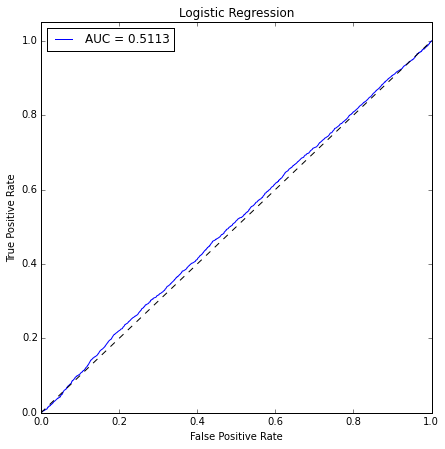

In [30]:
fig = plt.figure(figsize=(7,7))
fpr, tpr, thresholds = roc_curve(yh_test,logreg.fit(Xh_train, yh_train).predict_proba(Xh_test)[:,1])
plt.plot(fpr,tpr,label="AUC = "+str(round(auc(fpr,tpr),4)))
plt.legend(loc=0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05])
plt.title('Logistic Regression')
plt.xlabel('False Positive Rate'); 
plt.ylabel('True Positive Rate')

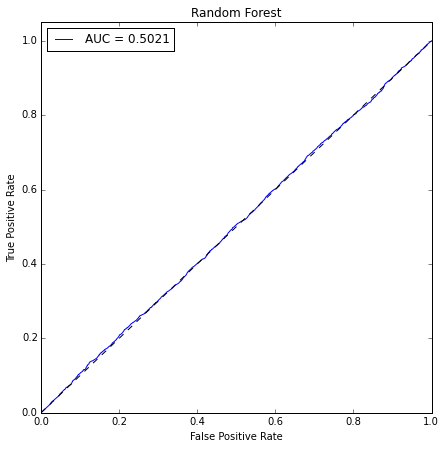

In [31]:
fig = plt.figure(figsize=(7,7))
fpr, tpr, thresholds = roc_curve(yh_test,rf_model.fit(Xh_train, yh_train).predict_proba(Xh_test)[:,1])
plt.plot(fpr,tpr,label="AUC = "+str(round(auc(fpr,tpr),4)))
plt.legend(loc=0)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05])
plt.title('Random Forest')
plt.xlabel('False Positive Rate'); 
plt.ylabel('True Positive Rate')

### Load the test data set, clean it and predict results based on Logistic Regression model

In [36]:
test_set = pd.read_csv('test_set.csv')
print test_set.shape
test_set.head()

(8238, 41)


,Unnamed: 0,age,default,housing,loan,contact,month,day_of_week,duration,campaign,...,marital_divorced,marital_married,marital_single,marital_unknown,basic_basic,basic_high_school,basic_illiterate,basic_professional_course,basic_university_degree,basic_unknown
0,25985,50,no,yes,no,cellular,nov,wed,236,1,...,0,1,0,0,0,0,0,0,1,0
1,27973,33,no,yes,no,cellular,apr,wed,351,3,...,0,1,0,0,1,0,0,0,0,0
2,4675,31,no,no,no,telephone,may,wed,287,3,...,0,1,0,0,0,0,0,1,0,0
3,32461,30,no,no,yes,cellular,may,fri,154,2,...,0,0,1,0,0,1,0,0,0,0
4,23579,37,unknown,no,yes,cellular,aug,thu,156,1,...,0,1,0,0,0,0,0,0,1,0


In [37]:
test_housing = test_set[['age', 'job_admin_', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'basic_basic',
       'basic_high_school', 'basic_illiterate', 'basic_professional_course',
       'basic_university_degree']]
test_housing.head()

,age,job_admin_,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,basic_basic,basic_high_school,basic_illiterate,basic_professional_course,basic_university_degree
0,50,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1,33,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,31,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,30,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,37,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [38]:
# Drop all the unknown values from the data set 

test_housing = test_housing.replace('unknown', np.nan)
test_housing = test_housing.dropna()
test_housing.shape

(8238, 20)

In [39]:
# Predictions for the test data set. 
predictions = logreg.predict(test_housing)

In [41]:
predictions

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])